 # Introduction
This project aims to predict the gender of individuals based on dental measurements.this I will use four different **classifiers, Random Forest, XGBoost, Decision Tree, and Logistic Regression**,to perform this prediction and evaluate their performance

# Step 1:Data Processing

in this step we importing all nacerccery package for devlope model and look out the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
# Load the dataset
data=pd.read_csv('Dentistry Dataset.csv')

In [ ]:
data.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [ ]:
data.sample(10)

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
1051,1052,NaN,20,Male,27.72,27.72,6.47,6.48,6.83,6.84,0.233,0.233,0.246,0.246
119,120,NaN,22,Female,25.87,25.88,6.12,6.12,6.36,6.36,0.236,0.236,0.247,0.247
1093,1094,NaN,22,Male,25.52,25.52,6.68,6.68,6.76,6.76,0.262,0.262,0.265,0.265
766,767,NaN,24,Male,29.22,29.22,7.27,7.27,7.28,7.28,0.249,0.249,0.249,0.249
346,347,NaN,23,Female,24.66,24.66,6.20,6.20,6.33,6.33,0.254,0.254,0.256,0.256
152,153,NaN,24,Female,24.19,24.20,6.09,6.11,6.25,6.25,0.252,0.252,0.258,0.258
882,883,NaN,21,Male,26.46,26.45,6.41,6.42,6.70,6.70,0.242,0.242,0.253,0.253
221,222,NaN,20,Female,23.85,23.85,6.07,6.08,6.08,6.08,0.252,0.253,0.253,0.253
1036,1037,NaN,25,Male,28.24,28.24,7.14,7.14,7.17,7.17,0.252,0.252,0.253,0.253
588,589,NaN,22,Female,24.91,24.91,6.48,6.48,6.48,6.48,0.259,0.259,0.259,0.259


In [ ]:

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [ ]:
data.describe(include='all')

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,0.0,1100.000000,1100,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,550.500000,NaN,21.625455,NaN,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,317.686953,NaN,2.085892,NaN,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,1.000000,NaN,18.000000,NaN,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,275.750000,NaN,20.000000,NaN,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,550.500000,NaN,22.000000,NaN,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,825.250000,NaN,23.000000,NaN,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000


In [ ]:
data.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

# Step 2: Handle Missing Values

 1. According dataot, there are no missing values in the numerical columns
 2. Sample ID column has no entries, so it's likely irrelevant and can be dropped


In [ ]:
data.drop(columns=['Sample ID'],inplace=True)

In [ ]:
data.head()

,Sl No,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


# Step 3: EDA

C:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

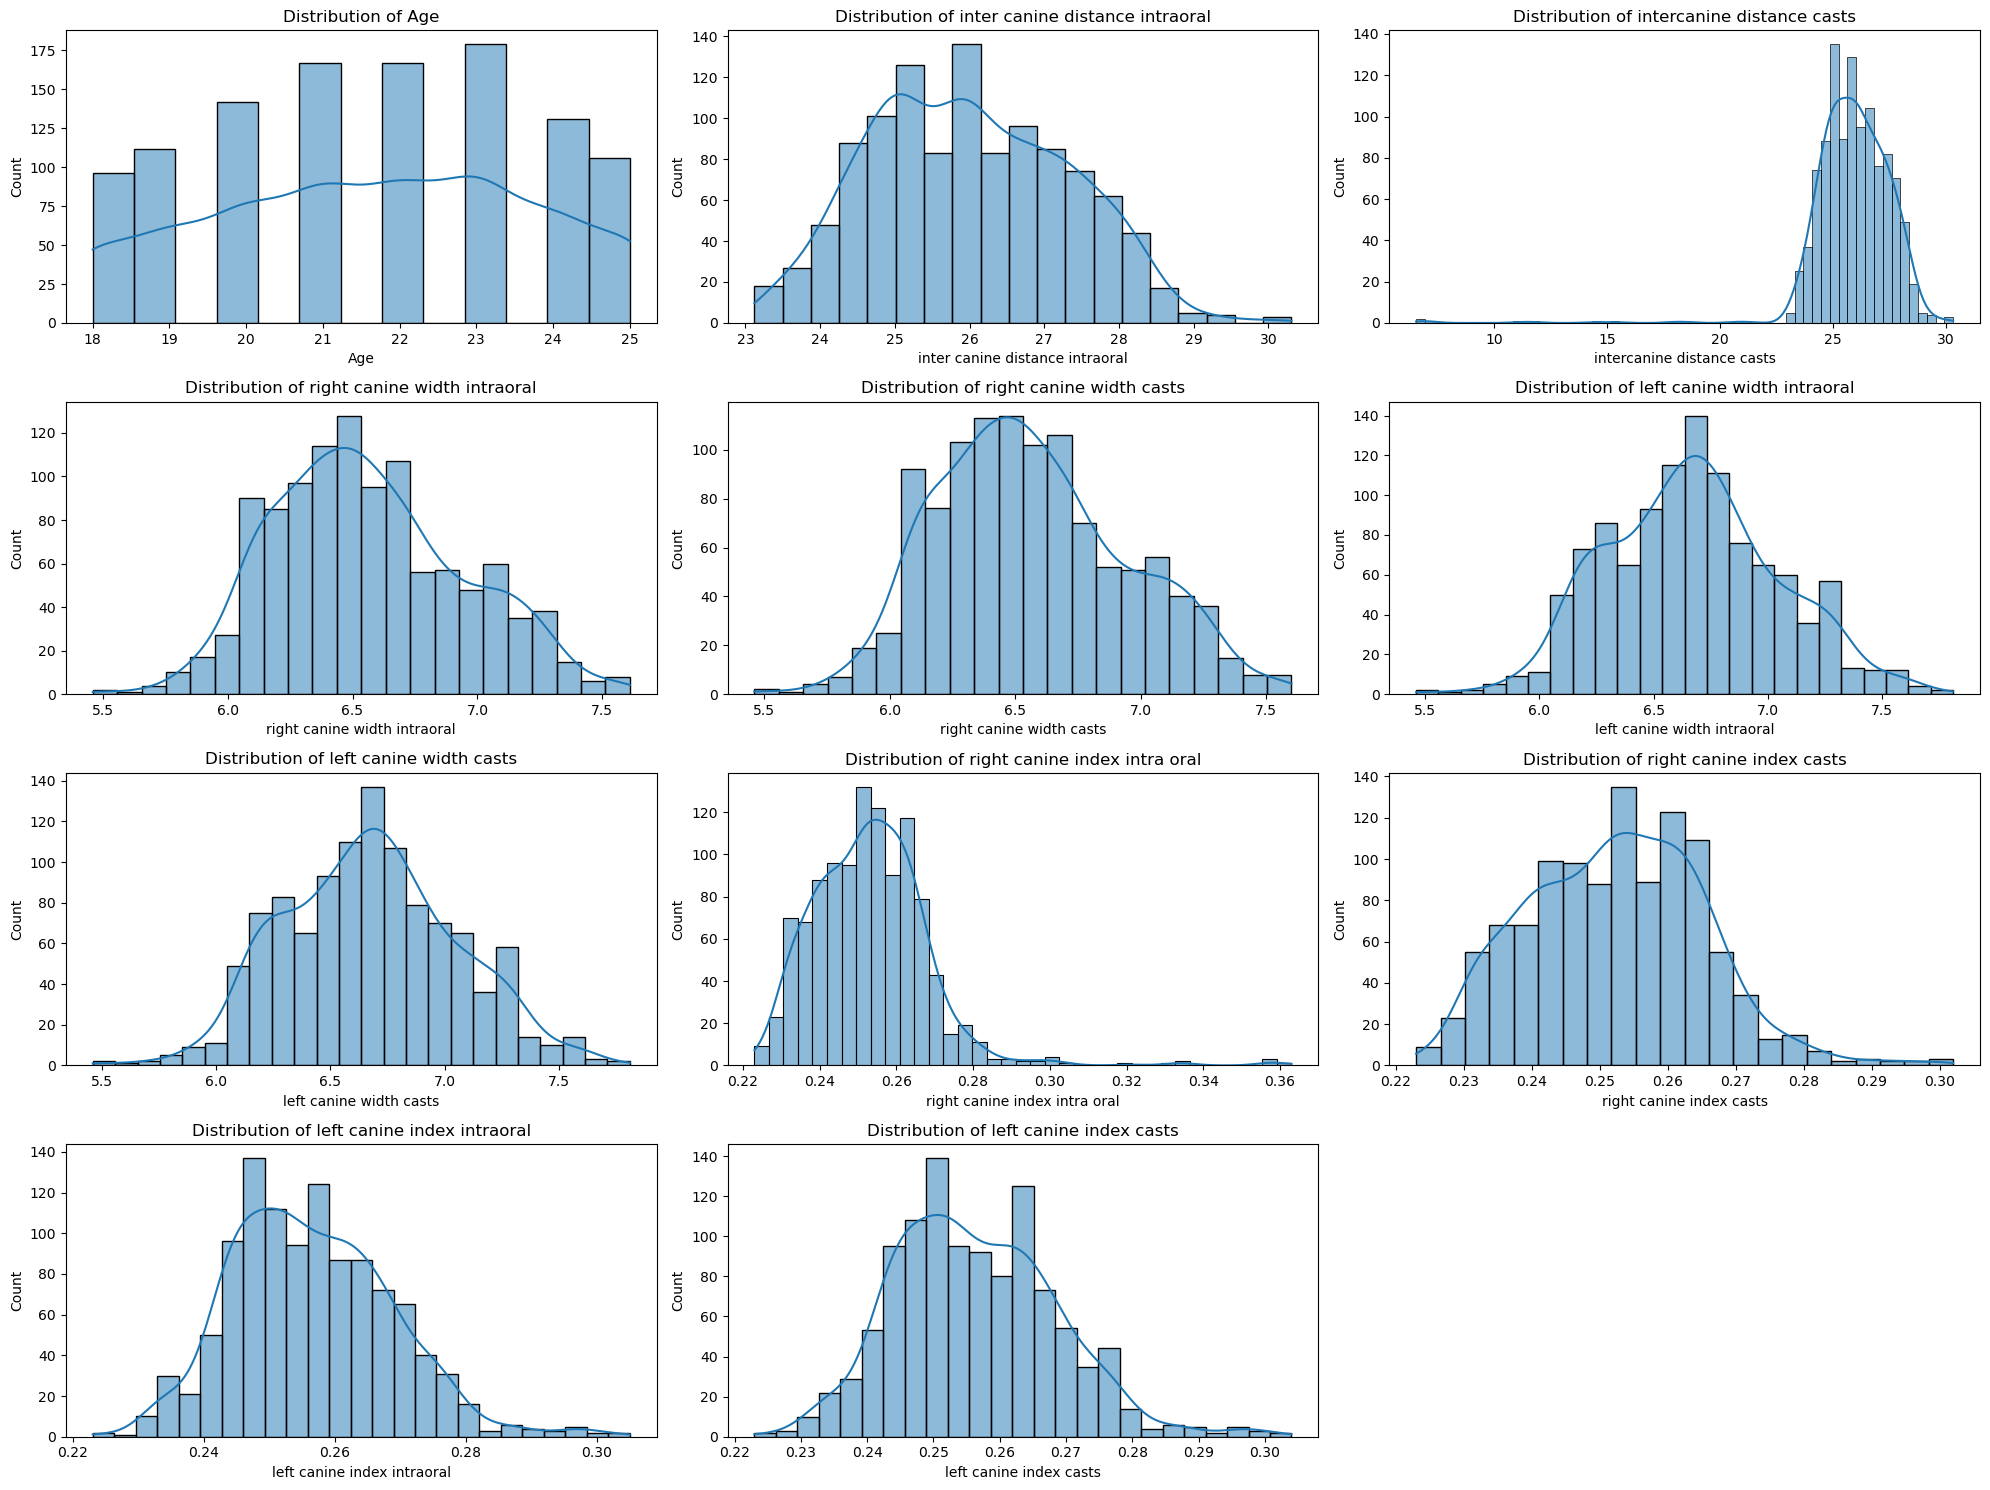

In [ ]:
# Distribution Numerical columns
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


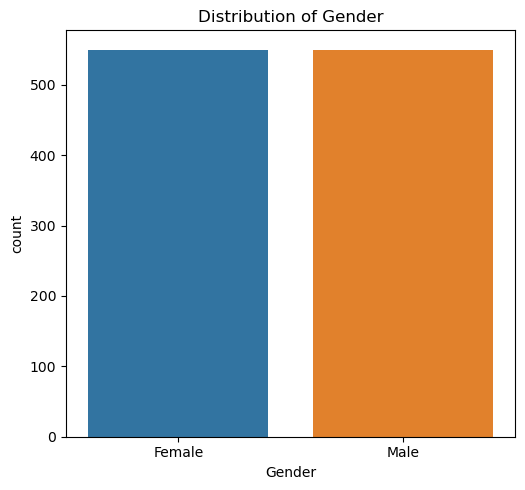

In [ ]:

#  Distribution of Categorical Features
categorical_features = ['Gender']

plt.figure(figsize=(10, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()



In [ ]:
df_X=data.drop(columns=['Gender'])

In [ ]:
df_Y = pd.get_dummies(data['Gender'], columns=['Gender'], prefix='Gender', drop_first=True)

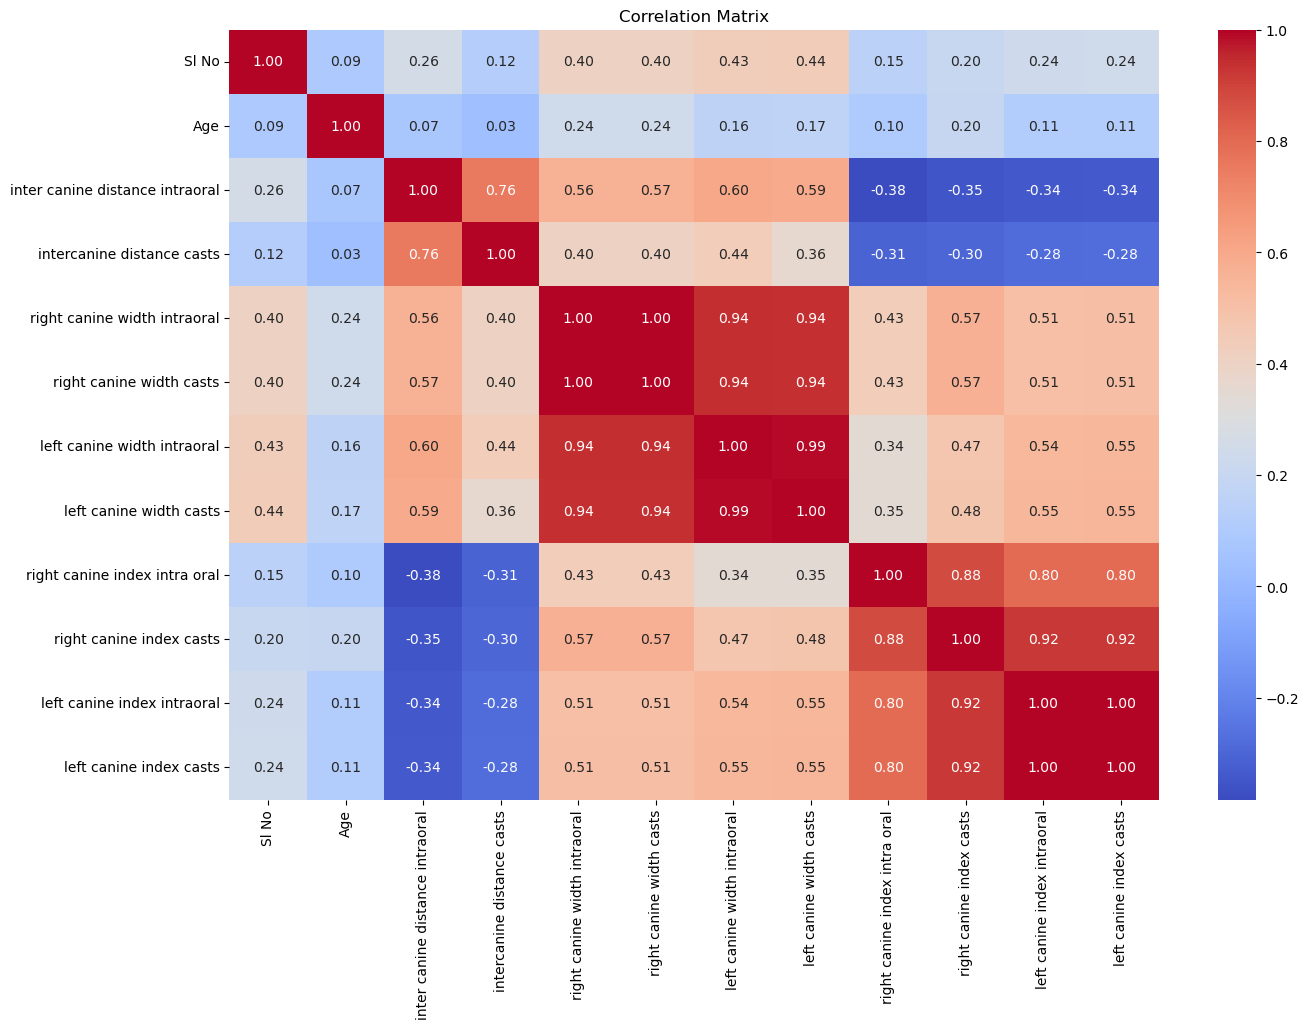

In [ ]:
# Correlation Matrix
plt.figure(figsize=(15, 10))
corr_matrix = df_X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

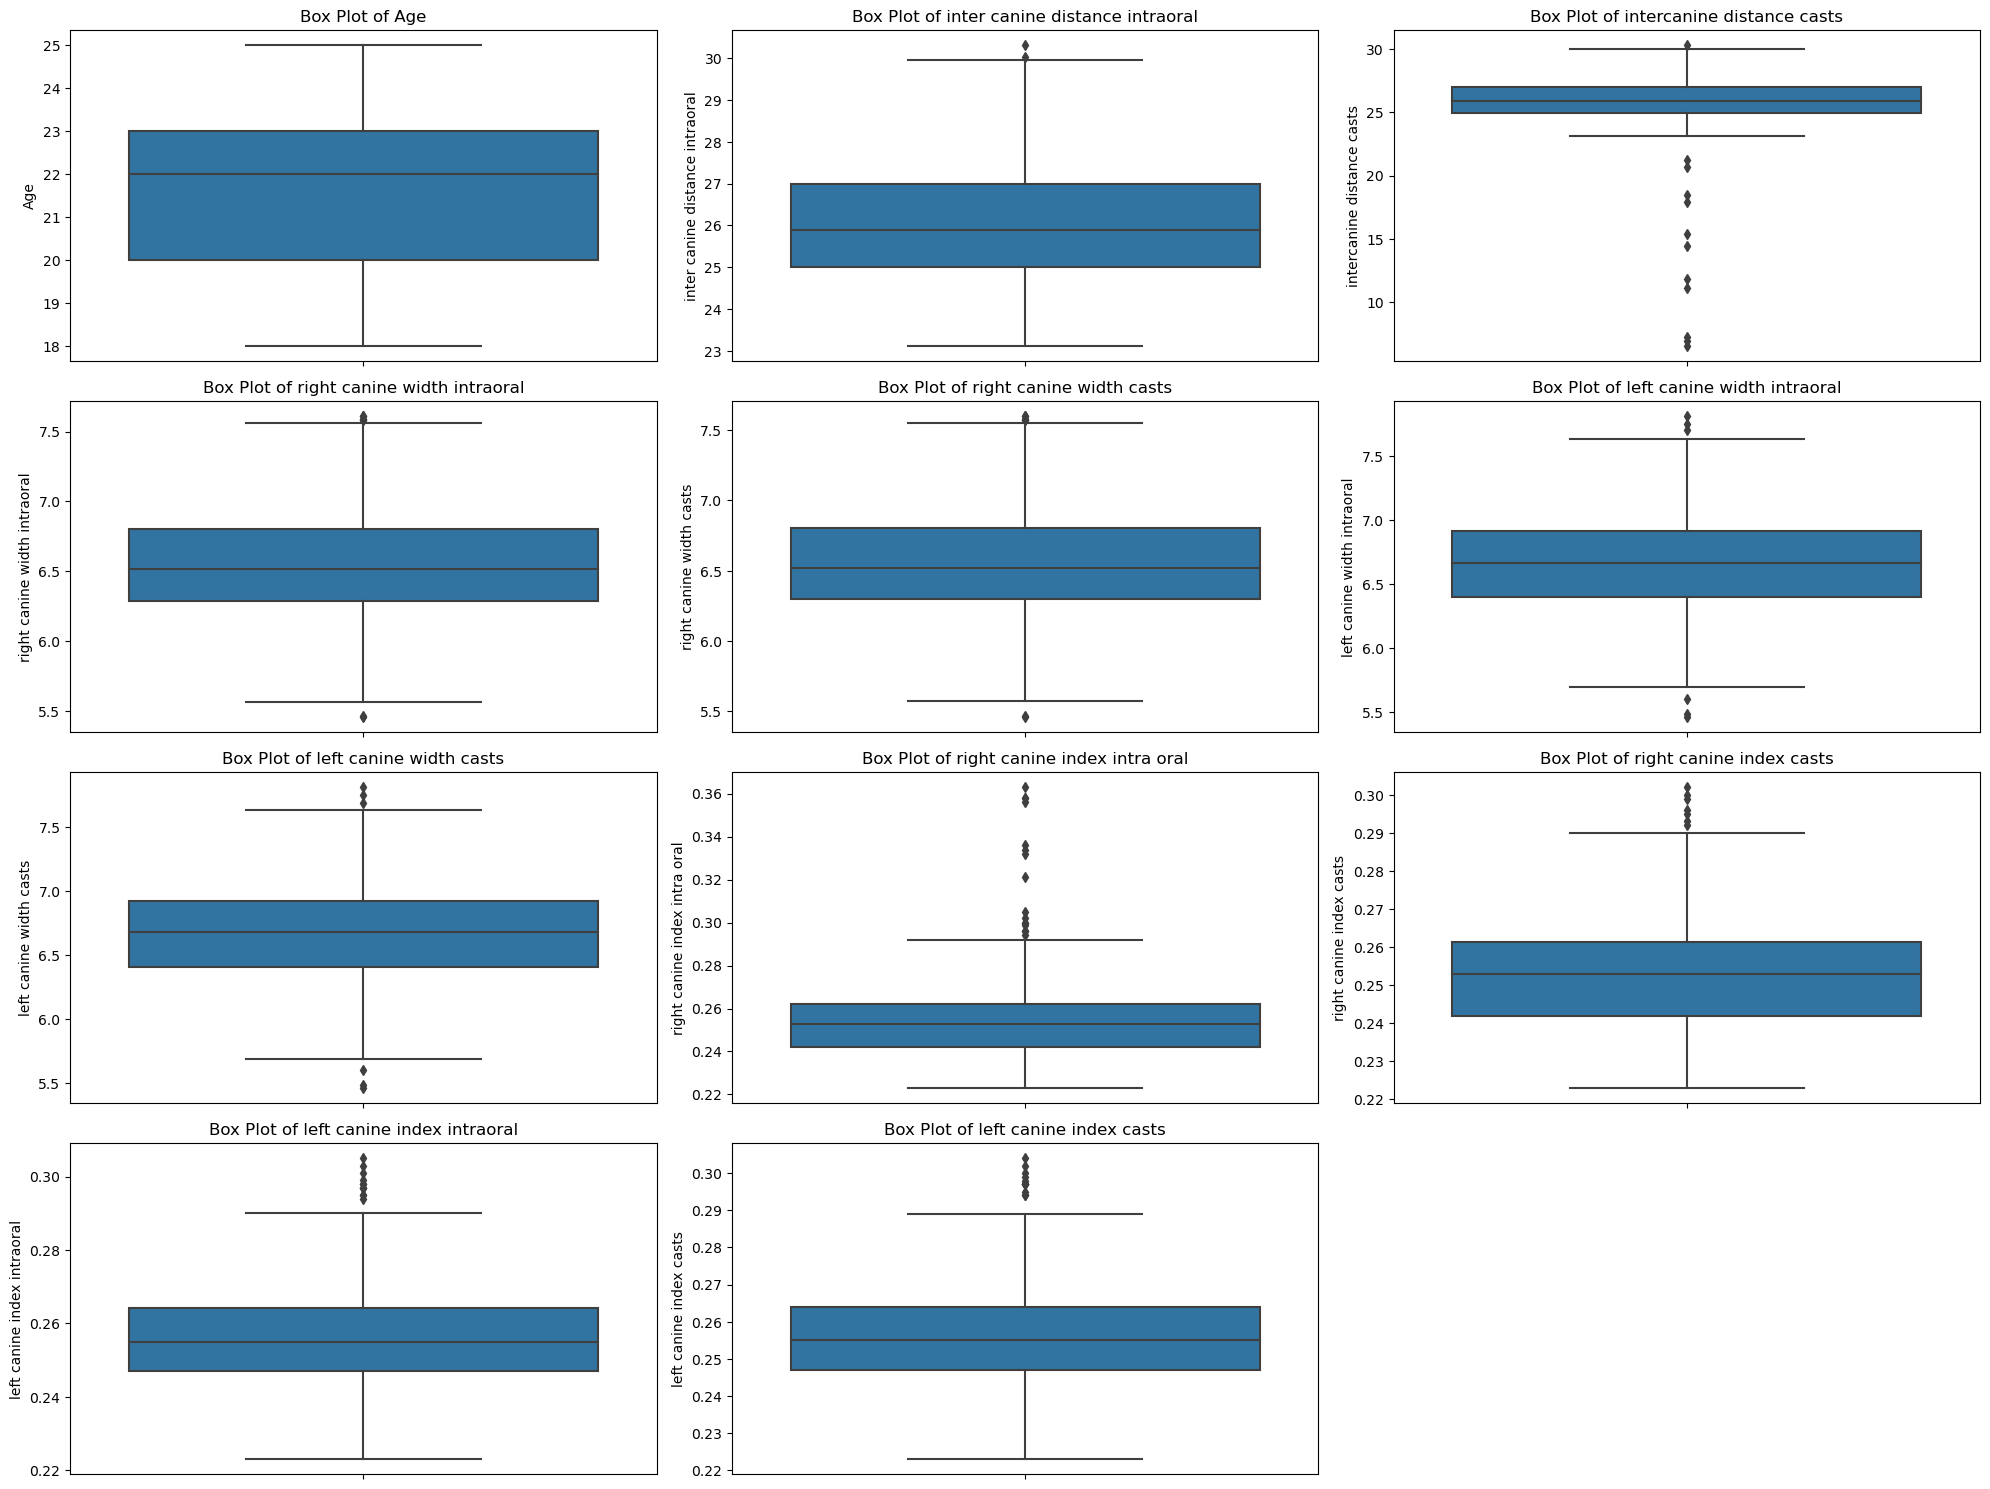

In [ ]:
# Box Plots for Outliers
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

## Handling Outliers and Correlations

1. **Handling Correlated Features**

We also found that there are several highly correlated features in the dataset. Highly correlated features can lead to multicollinearity, which can negatively impact the performance of some machine learning models. To address this, we will identify pairs of highly correlated features and drop one feature from each pair.


In [ ]:
threshold = 0.85
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns
                   if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold]

high_corr_pairs

[('right canine width intraoral', 'right canine width casts'),
 ('right canine width intraoral', 'left canine width intraoral'),
 ('right canine width intraoral', 'left canine width casts'),
 ('right canine width casts', 'right canine width intraoral'),
 ('right canine width casts', 'left canine width intraoral'),
 ('right canine width casts', 'left canine width casts'),
 ('left canine width intraoral', 'right canine width intraoral'),
 ('left canine width intraoral', 'right canine width casts'),
 ('left canine width intraoral', 'left canine width casts'),
 ('left canine width casts', 'right canine width intraoral'),
 ('left canine width casts', 'right canine width casts'),
 ('left canine width casts', 'left canine width intraoral'),
 ('right canine index intra oral', 'right canine index casts'),
 ('right canine index casts', 'right canine index intra oral'),
 ('right canine index casts', 'left canine index intraoral'),
 ('right canine index casts', 'left canine index casts'),
 ('left 

In [ ]:

# Drop one of each pair of highly correlated features
features_to_drop = set()
for col1, col2 in high_corr_pairs:
    if col1 not in features_to_drop and col2 not in features_to_drop:
        features_to_drop.add(col2)

data_reduced = data.drop(columns=features_to_drop)
features_to_drop

{'left canine index casts',
 'left canine width casts',
 'left canine width intraoral',
 'right canine index casts',
 'right canine width casts'}

1. **Handling Outliers**

During Exploratory Data Analysis (EDA), we identified that there are many outliers present in the dataset. To deal with these outliers, we will use the Interquartile Range (IQR) method to detect and remove them.

In [ ]:
for count, i in enumerate(df.columns[1:4]):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1

    out_q1 = q1 - 1.5 * iqr
    out_q3 = q3 + 1.5 * iqr

    # Finding outliers
    outliers = (df_X[i] < out_q1) | (df_X[i] > out_q3)
    num_outliers = outliers.sum()

    # Replacing outliers with the median value of the column
    df_X[i] = np.where(outliers, df_X[i].median(), df_X[i])

    # Re-checking for outliers after replacement
    remaining_outliers = ((df_X[i] < out_q1) | (df_X[i] > out_q3)).sum()

    # Printing the results
    print(f"Total No. of Outliers in column '{i}' before replacement: {num_outliers}")
    print(f"Total No. of Outliers in column '{i}' after replacement: {remaining_outliers}")



Total No. of Outliers in column 'Age' before replacement: 0
Total No. of Outliers in column 'Age' after replacement: 0
Total No. of Outliers in column 'inter canine distance intraoral' before replacement: 2
Total No. of Outliers in column 'inter canine distance intraoral' after replacement: 0
Total No. of Outliers in column 'intercanine distance casts' before replacement: 14
Total No. of Outliers in column 'intercanine distance casts' after replacement: 0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y, test_size=0.2)

In [ ]:
# Standardize the
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled=scaler.fit_transform(X_test)

# Model Building

 LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(Xtrain_scaled,y_train)
y_pred_lr = LR.predict(Xtest_scaled)
y_pred_prob = LR.predict_proba(Xtest_scaled)[:, 1]


C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
LR.score(Xtrain_scaled,y_train)

0.9238636363636363

In [ ]:
LR.score(Xtest_scaled,y_test)

0.9318181818181818

In [ ]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_lr)
accuracy = accuracy_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
# Print evaluation metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")


Confusion Matrix:
[[107   3]
 [ 12  98]]
Accuracy: 0.9318181818181818
ROC AUC: 0.9524793388429752


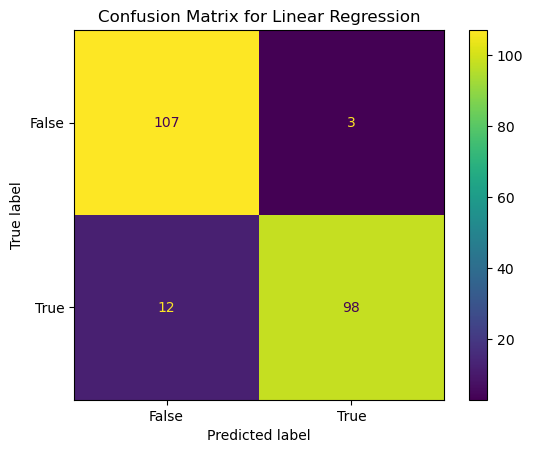

In [ ]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=LR.classes_)
disp.plot()
plt.title('Confusion Matrix for Linear Regression')
plt.show()



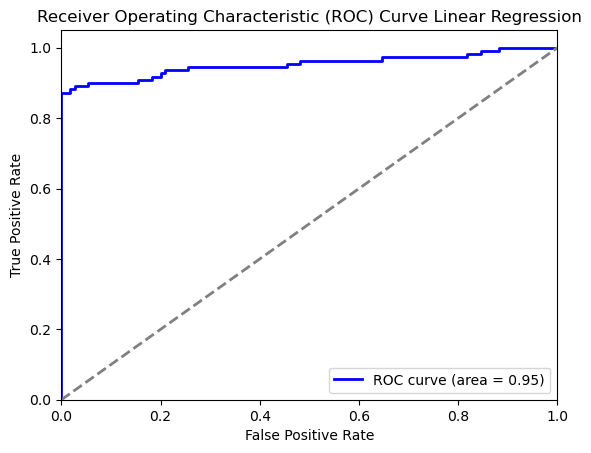

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Linear Regression')
plt.legend(loc="lower right")
plt.show()

DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(Xtrain_scaled,y_train)
y_pred= dt.predict(Xtest_scaled)
y_pred_prob = dt.predict_proba(Xtest_scaled)[:, 1]

In [ ]:
dt.score(Xtest_scaled,y_test)

0.9318181818181818

In [ ]:
dt.score(Xtrain_scaled,y_train)

1.0

In [ ]:

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Print evaluation metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

Confusion Matrix:
[[ 99  11]
 [  4 106]]
Accuracy: 0.9318181818181818
ROC AUC: 0.9318181818181819


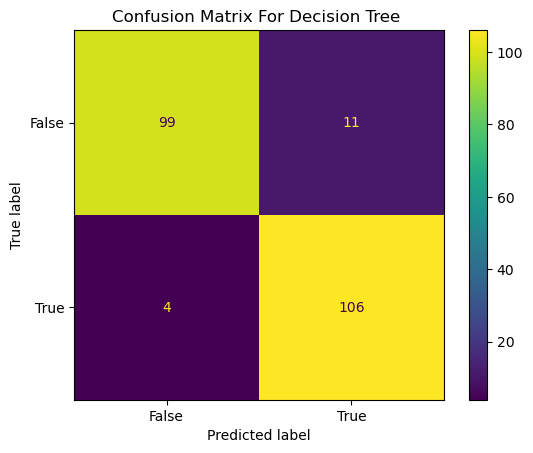

In [ ]:
# Plot confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dt.classes_)
disp.plot()
plt.title('Confusion Matrix For Decision Tree ')
plt.show()

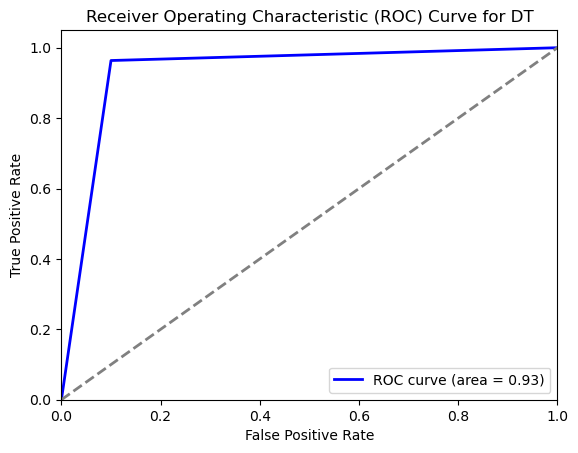

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for DT')
plt.legend(loc="lower right")
plt.show()

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(Xtrain_scaled,y_train)
y_pred = RF.predict(Xtest_scaled)
y_pred_prob = RF.predict_proba(Xtest_scaled)[:, 1]

C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
RF.score(Xtrain_scaled,y_train)

1.0

In [ ]:
RF.score(Xtest_scaled,y_test)

0.95

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
# Print evaluation metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

Confusion Matrix:
[[100  10]
 [  4 106]]
Accuracy: 0.95
ROC AUC: 0.9926033057851239


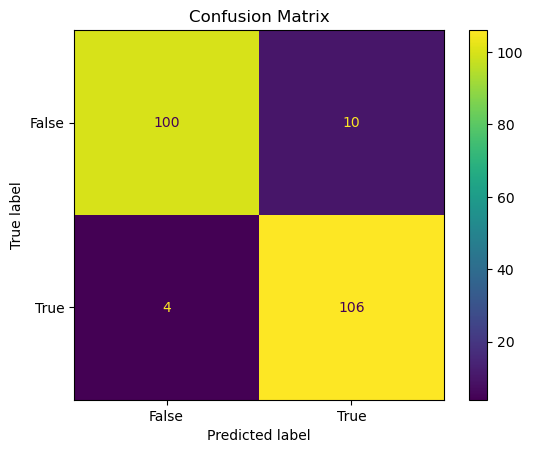

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=RF.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


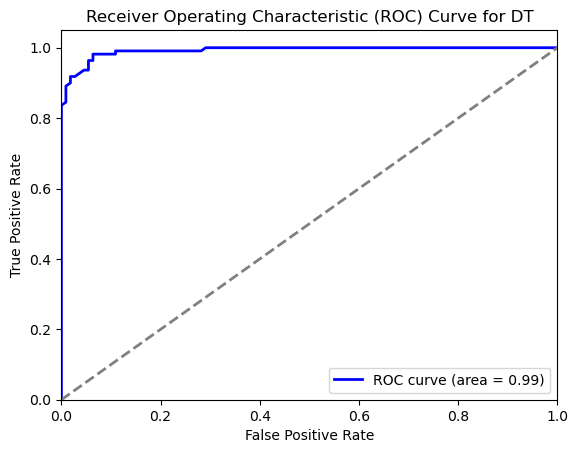

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for DT')
plt.legend(loc="lower right")
plt.show()

The classifier demonstrates excellent performance with an AUC of 0.99, indicating it is highly effective at distinguishing between classes. This means the model is very accurate in predicting the gender based on the features provided.

XGBoost classifier

In [ ]:
# Create and train the XGBoost classifier
xbc = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xbc.fit(Xtrain_scaled, y_train)
y_pred = xbc.predict(Xtest_scaled)
y_pred_prob = xbc.predict_proba(Xtest_scaled)[:, 1]

In [ ]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
# Print evaluation metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

Confusion Matrix:
[[100  10]
 [  4 106]]
Accuracy: 0.9363636363636364
ROC AUC: 0.9737190082644629


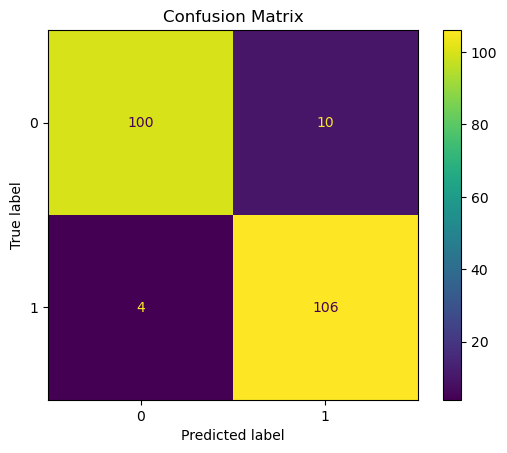

In [ ]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=xbc.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


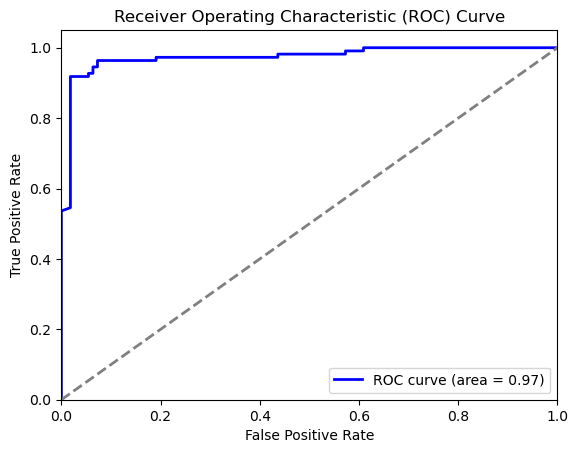

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The classifier show AUC of 0.97. This means the model is very accurate in predicting the gender based on the features provided.

####  Outcome

The outcomes of this project include the trained models and their performance metrics. All models were evaluated based on the confusion matrix, accuracy, ROC curve

